In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("bigmart.csv")

# UNDERSTANDING THE DATA

In [3]:
data.head()
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
count_missing = data.isnull().sum()
count_missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# GRAPHS FOR THE DATA BEFORE PROCESSING IT

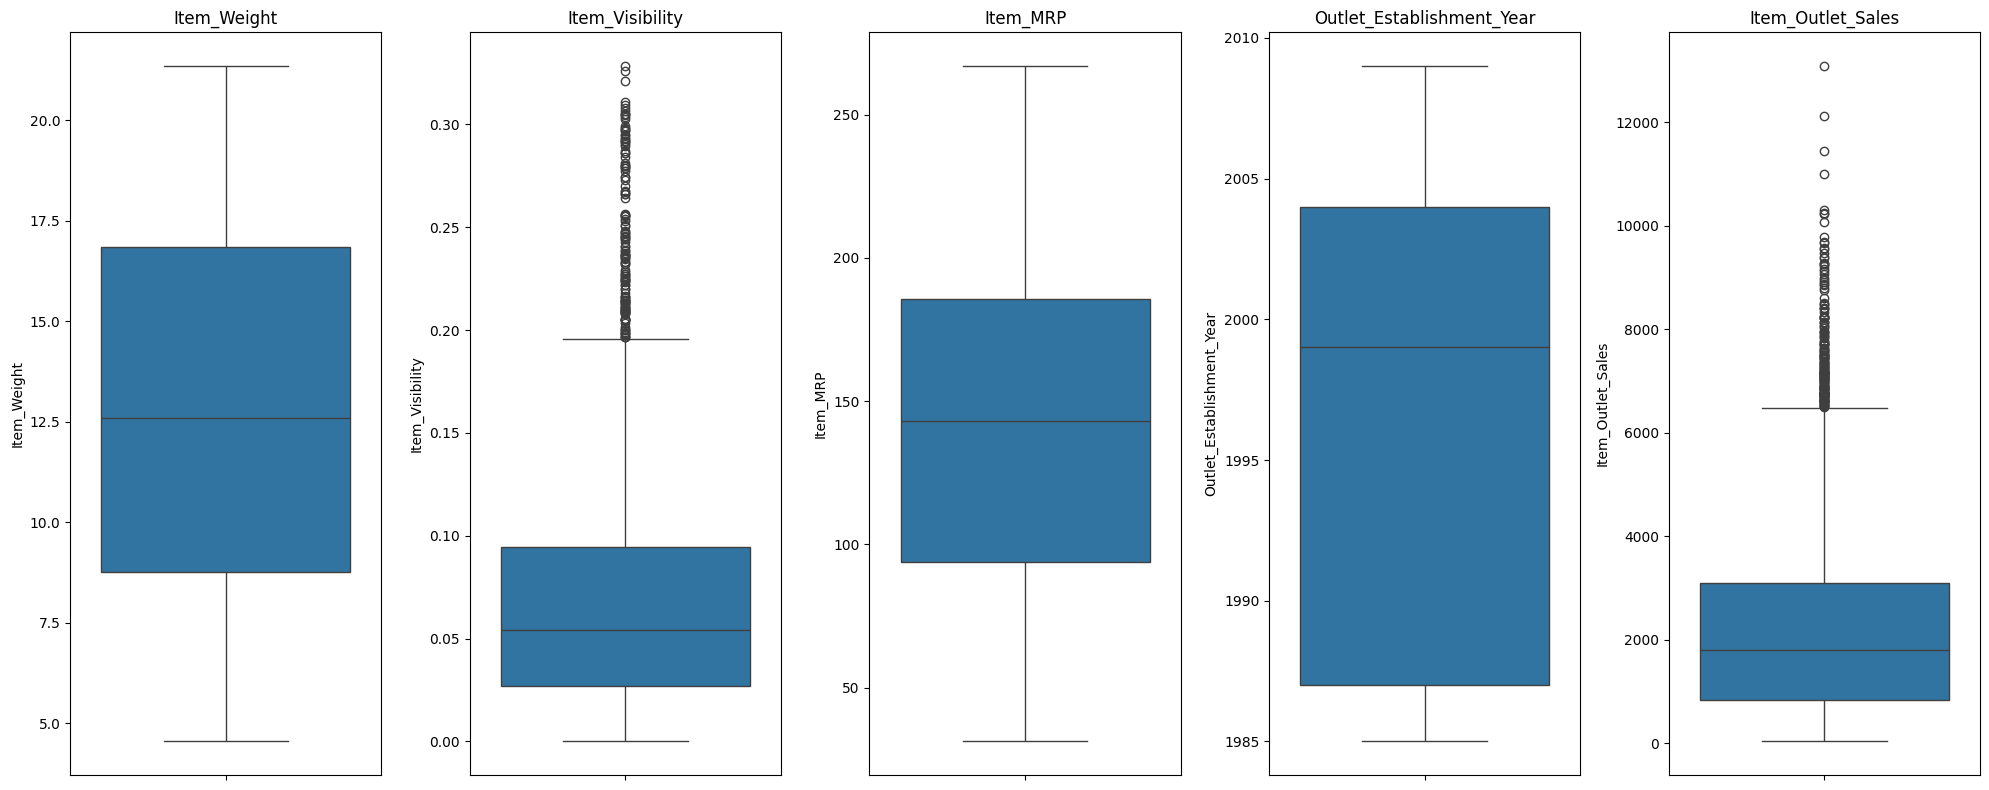

In [7]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i) 
    sns.boxplot(y=data[column])
    plt.title(column)
    
plt.tight_layout()
plt.show()

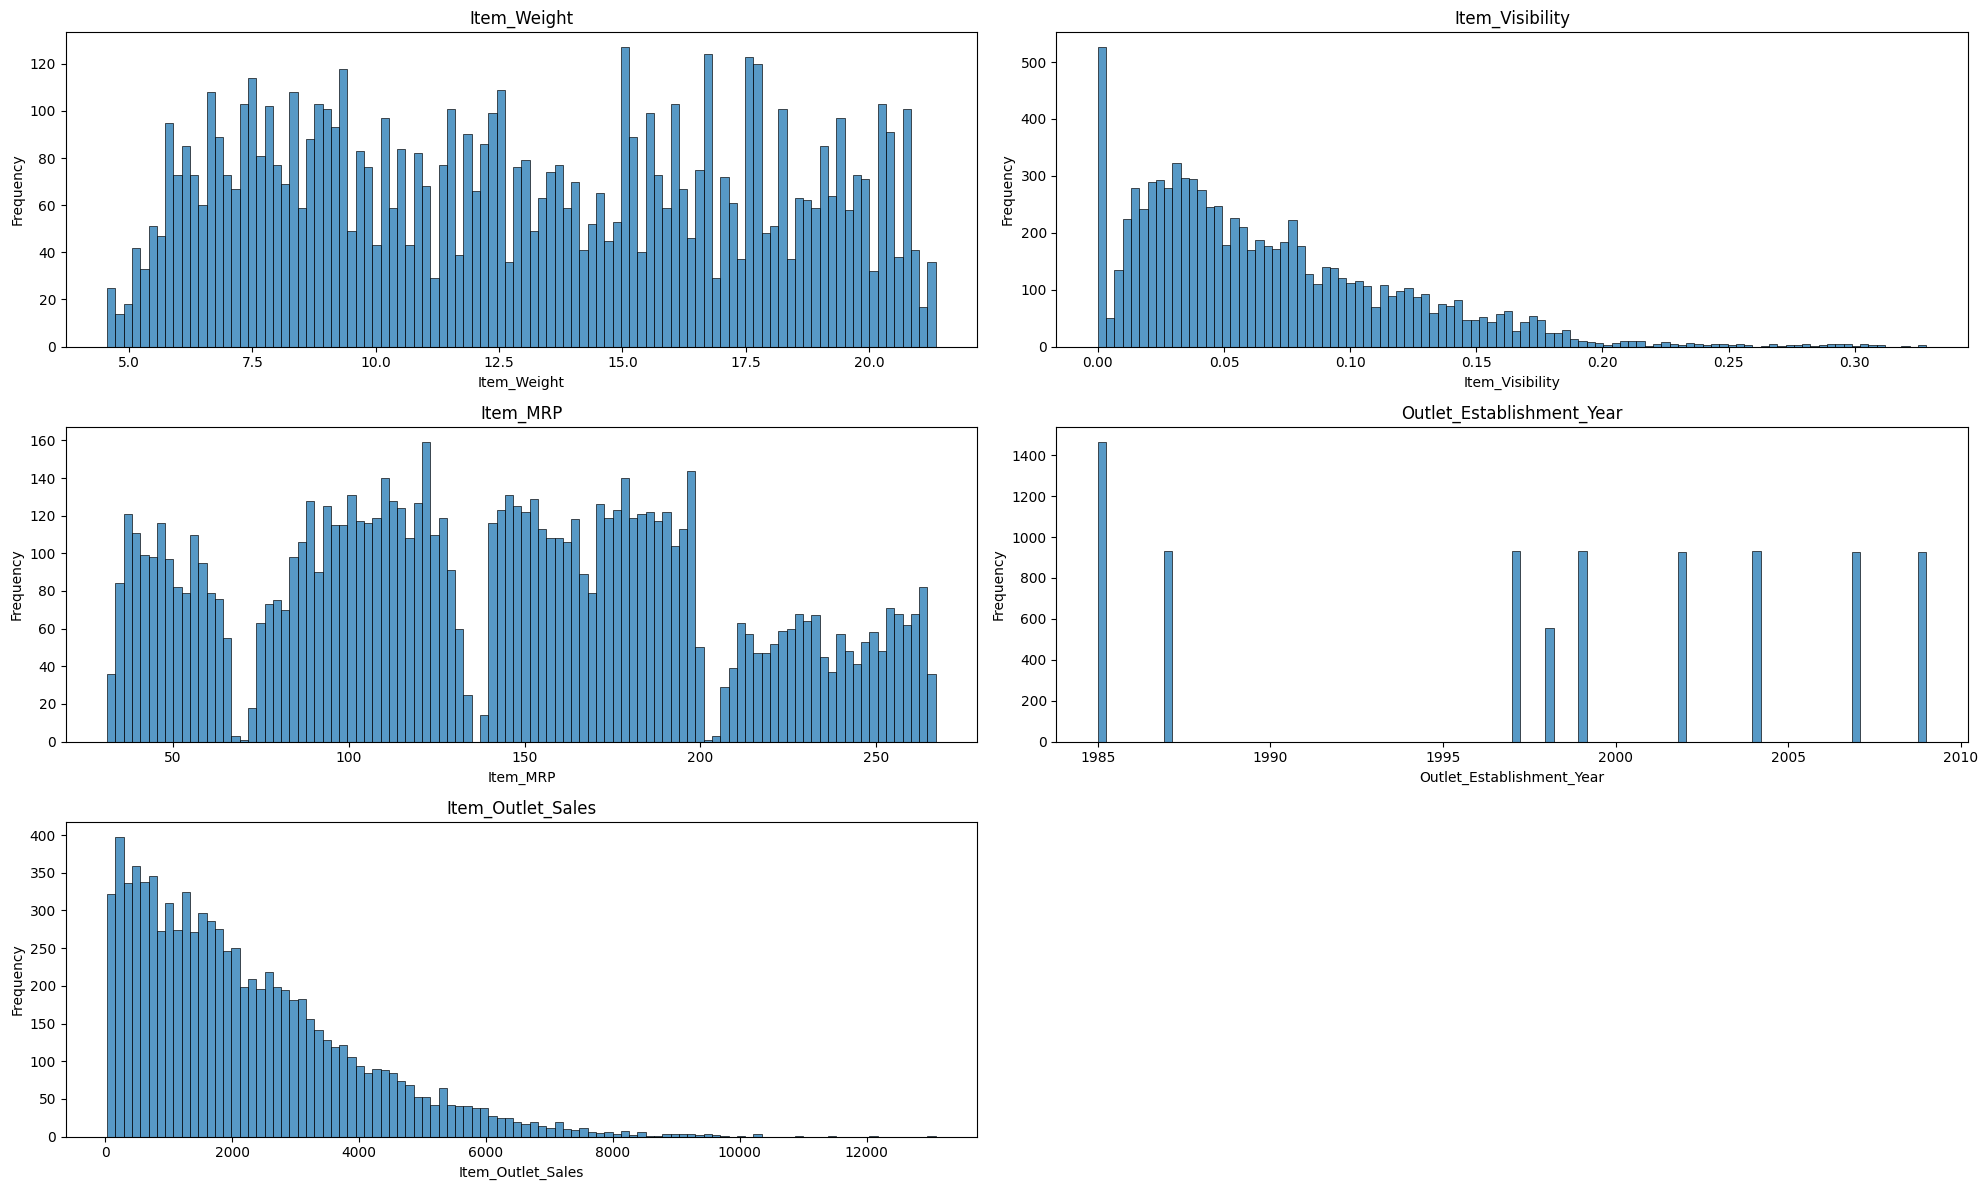

In [8]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 12))

num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2 

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 2, i)  
    sns.histplot(x=data[column], bins=100)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

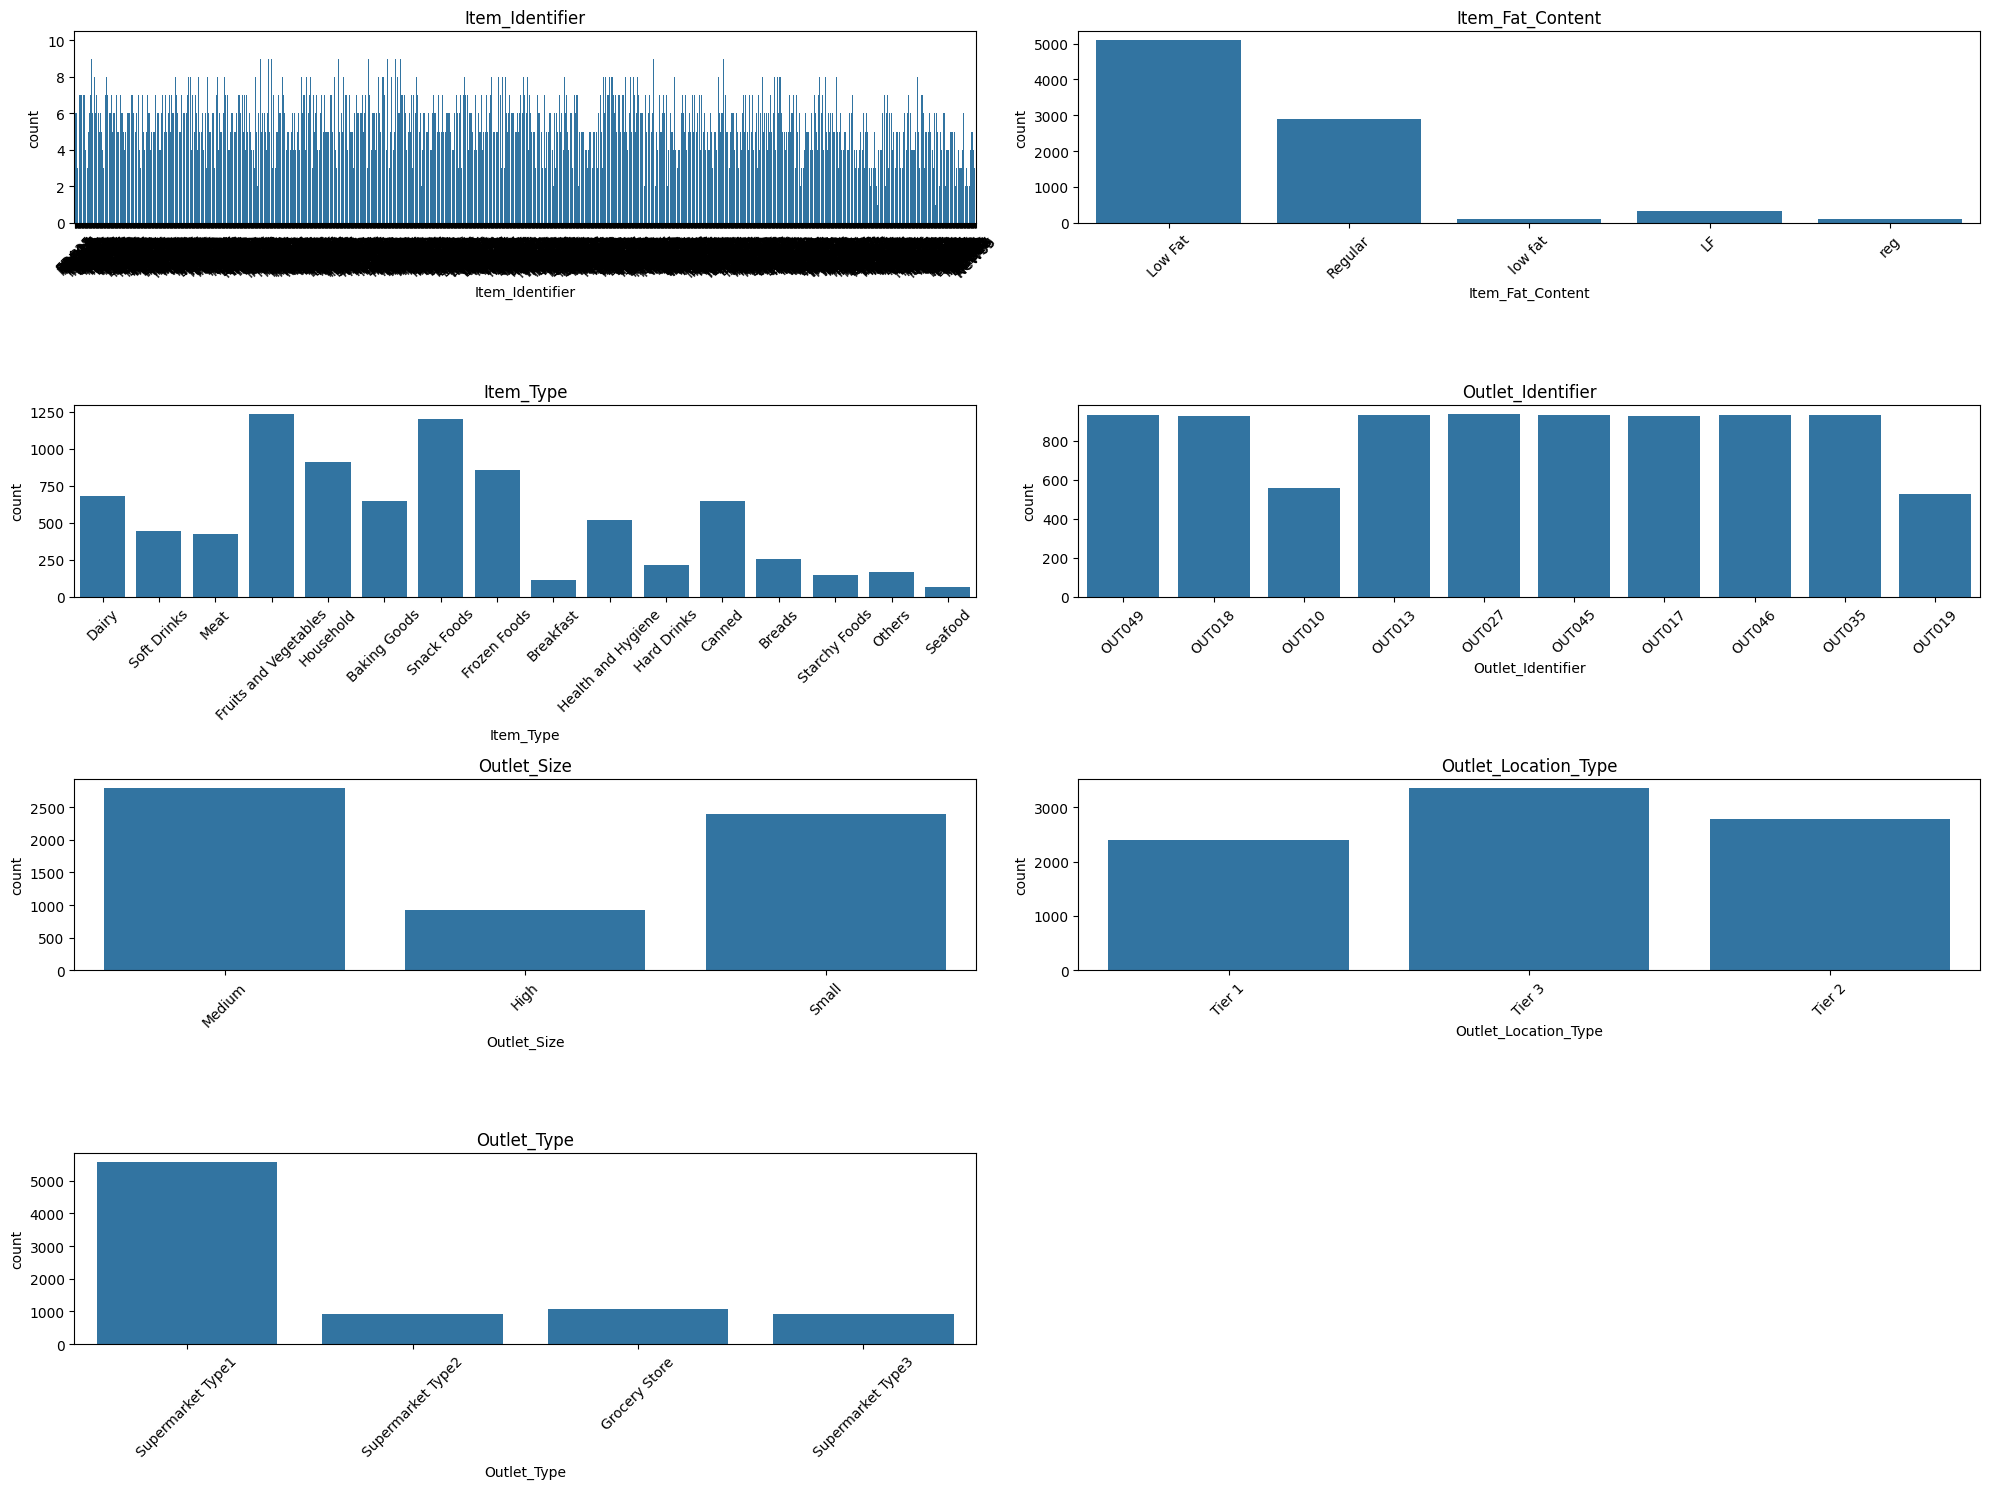

In [9]:
categorical_columns = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 15))

num_cols = len(categorical_columns)
num_rows = (num_cols + 1) // 2  

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 2, i)  
    sns.countplot(data=data, x=column)
    plt.title(column)
    plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()


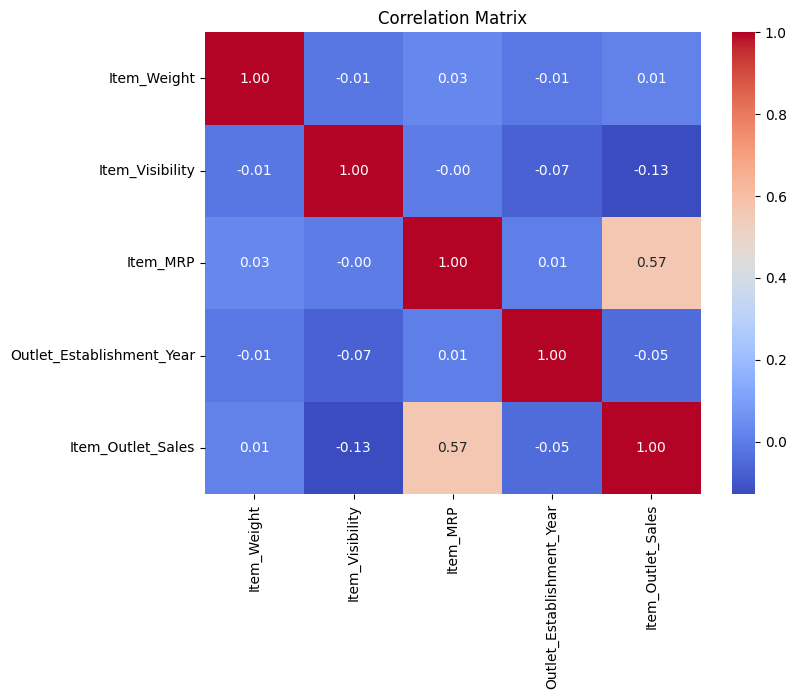

In [10]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# DATA CLEANING

In [11]:
count_missing_values_Item_Weight = data['Item_Weight'].isnull().sum()
print(f"There is {count_missing_values_Item_Weight} missing values in Item_Weight column")



There is 1463 missing values in Item_Weight column


In [12]:
mean_product_weight = data.groupby('Item_Identifier')['Item_Weight'].transform('mean')
print(mean_product_weight)

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64


In [13]:
data['Item_Weight'] = data['Item_Weight'].fillna(mean_product_weight)

In [14]:
count_missing_values_Item_Weight = data['Item_Weight'].isnull().sum()
print(f"There is {count_missing_values_Item_Weight} missing values in Item_Weight column after filling it with mean values")



There is 4 missing values in Item_Weight column after filling it with mean values


In [15]:
rows_with_missing_values = data[data['Item_Weight'].isnull()]
rows_with_missing_values

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [16]:
data.dropna(subset=['Item_Weight'], inplace=True)

In [17]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [18]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'reg': 'Regular',
    'low fat': 'Low Fat'
})

In [19]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5516
Regular    3003
Name: count, dtype: int64

In [20]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2790
Small     2387
High       932
Name: count, dtype: int64

In [21]:
count_missing_values_Outlet_Size = data['Outlet_Size'].isnull().sum()
print(f"There is {count_missing_values_Outlet_Size} missing values in Outlet_Size column")


There is 2410 missing values in Outlet_Size column


In [22]:
data[data['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [23]:
data[data['Outlet_Size'].isnull()]['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 2    1855
Tier 3     555
Name: count, dtype: int64

In [24]:
data[data['Outlet_Size'].isnull()]['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [25]:
data[data['Outlet_Size'].isnull()][["Outlet_Type", "Outlet_Location_Type"]].value_counts()

Outlet_Type        Outlet_Location_Type
Supermarket Type1  Tier 2                  1855
Grocery Store      Tier 3                   555
Name: count, dtype: int64

In [26]:
data[data['Outlet_Size'].notnull()][["Outlet_Type", "Outlet_Location_Type","Outlet_Size"]].value_counts().sort_index(level='Outlet_Type')

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          527
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                   Tier 2                Small          930
                   Tier 3                High           932
Supermarket Type2  Tier 3                Medium         928
Supermarket Type3  Tier 3                Medium         932
Name: count, dtype: int64

In [27]:
data.loc[(data['Outlet_Size'].isnull()) & (data['Outlet_Type'] == 'Grocery Store'), 'Outlet_Size'] = 'Small'


count_missing_values_Outlet_Size = data['Outlet_Size'].isnull().sum()
print(f"There is {count_missing_values_Outlet_Size} missing values in Outlet_Size after filling with the value Small in front of every grocery store ")


There is 1855 missing values in Outlet_Size after filling with the value Small in front of every grocery store 


In [28]:
data.loc[(data['Outlet_Size'].isnull()) & (data['Outlet_Location_Type'] == 'Tier 2'), 'Outlet_Size'] = 'Small'


count_missing_values_Outlet_Size = data['Outlet_Size'].isnull().sum()
print(f"There is {count_missing_values_Outlet_Size} missing values in Outlet_Size after filling with the value Small in front of every Tier 2 location ")


There is 0 missing values in Outlet_Size after filling with the value Small in front of every Tier 2 location 


# HANDELING OUTLIERS

In [29]:
data["Item_Visibility"] = data["Item_Visibility"].replace(0.0, np.nan)
data["Item_Visibility"].fillna(data["Item_Visibility"].median(),inplace=True)


/var/folders/rd/rm1ghq0950j6l712s6ykcc5w0000gn/T/ipykernel_4985/4161232296.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Item_Visibility"].fillna(data["Item_Visibility"].median(),inplace=True)


In [30]:
data['Item_Outlet_Sales'].describe()

count     8519.000000
mean      2181.188779
std       1706.511093
min         33.290000
25%        834.247400
50%       1794.331000
75%       3100.630600
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [31]:
IQR = data['Item_Outlet_Sales'].quantile(0.75) - data['Item_Outlet_Sales'].quantile(0.25)
sales_lower_bound = data['Item_Outlet_Sales'].quantile(0.25) - 1.5 * IQR
sales_upper_bound = data['Item_Outlet_Sales'].quantile(0.75) + 1.5 * IQR
print(f"IQR: {IQR}")
print(f"Lower bound: {sales_lower_bound}")
print(f"Upper bound: {sales_upper_bound}")

IQR: 2266.3832
Lower bound: -2565.3274
Upper bound: 6500.205400000001


In [32]:
data[data['Item_Outlet_Sales']>6500]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
130,FDY25,12.00,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
132,NCR53,12.15,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524
145,FDP16,18.60,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
203,FDI24,10.30,Low Fat,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.20,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062
8329,NCQ06,13.00,Low Fat,0.041622,Household,253.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630.0364
8350,NCE18,10.00,Low Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750
8447,FDS26,20.35,Low Fat,0.089975,Dairy,261.6594,OUT017,2007,Small,Tier 2,Supermarket Type1,7588.1226


In [33]:
data.drop(data[data['Item_Outlet_Sales']>6500].index, inplace=True)

In [34]:
data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1199
Snack Foods              1172
Household                 890
Frozen Foods              840
Dairy                     660
Baking Goods              638
Canned                    637
Health and Hygiene        511
Soft Drinks               434
Meat                      416
Breads                    245
Hard Drinks               210
Others                    169
Starchy Foods             144
Breakfast                 105
Seafood                    63
Name: count, dtype: int64

# FEATURE ENGINEERING

In [35]:
data["Item_Category"] = data["Item_Identifier"].apply(lambda x: x[:2])
data["Item_Category"].replace({"FD": "Food", "DR": "Drinks", "NC": "Non-Consumable"})


0                 Food
1               Drinks
2                 Food
3                 Food
4       Non-Consumable
             ...      
8518              Food
8519              Food
8520    Non-Consumable
8521              Food
8522            Drinks
Name: Item_Category, Length: 8333, dtype: object

In [36]:
data.loc[data["Item_Category"] == "NC", "Item_Fat_Content"] = "Non-Edible"


In [37]:
data["Outlet_Age"] = 2025 - data["Outlet_Establishment_Year"]

In [38]:
data["Price_per_Unit_Weight"] = data["Item_MRP"] / data["Item_Weight"]


In [39]:
data["Is_Supermarket"] = data["Outlet_Type"].apply(lambda x: 1 if "Supermarket" in x else 0)


In [40]:
# data = pd.get_dummies(data, columns=["Outlet_Location_Type", "Outlet_Type", "Item_Fat_Content", "Item_Category"], drop_first=True)

# GRAPHS AFTER PREPROCESSING

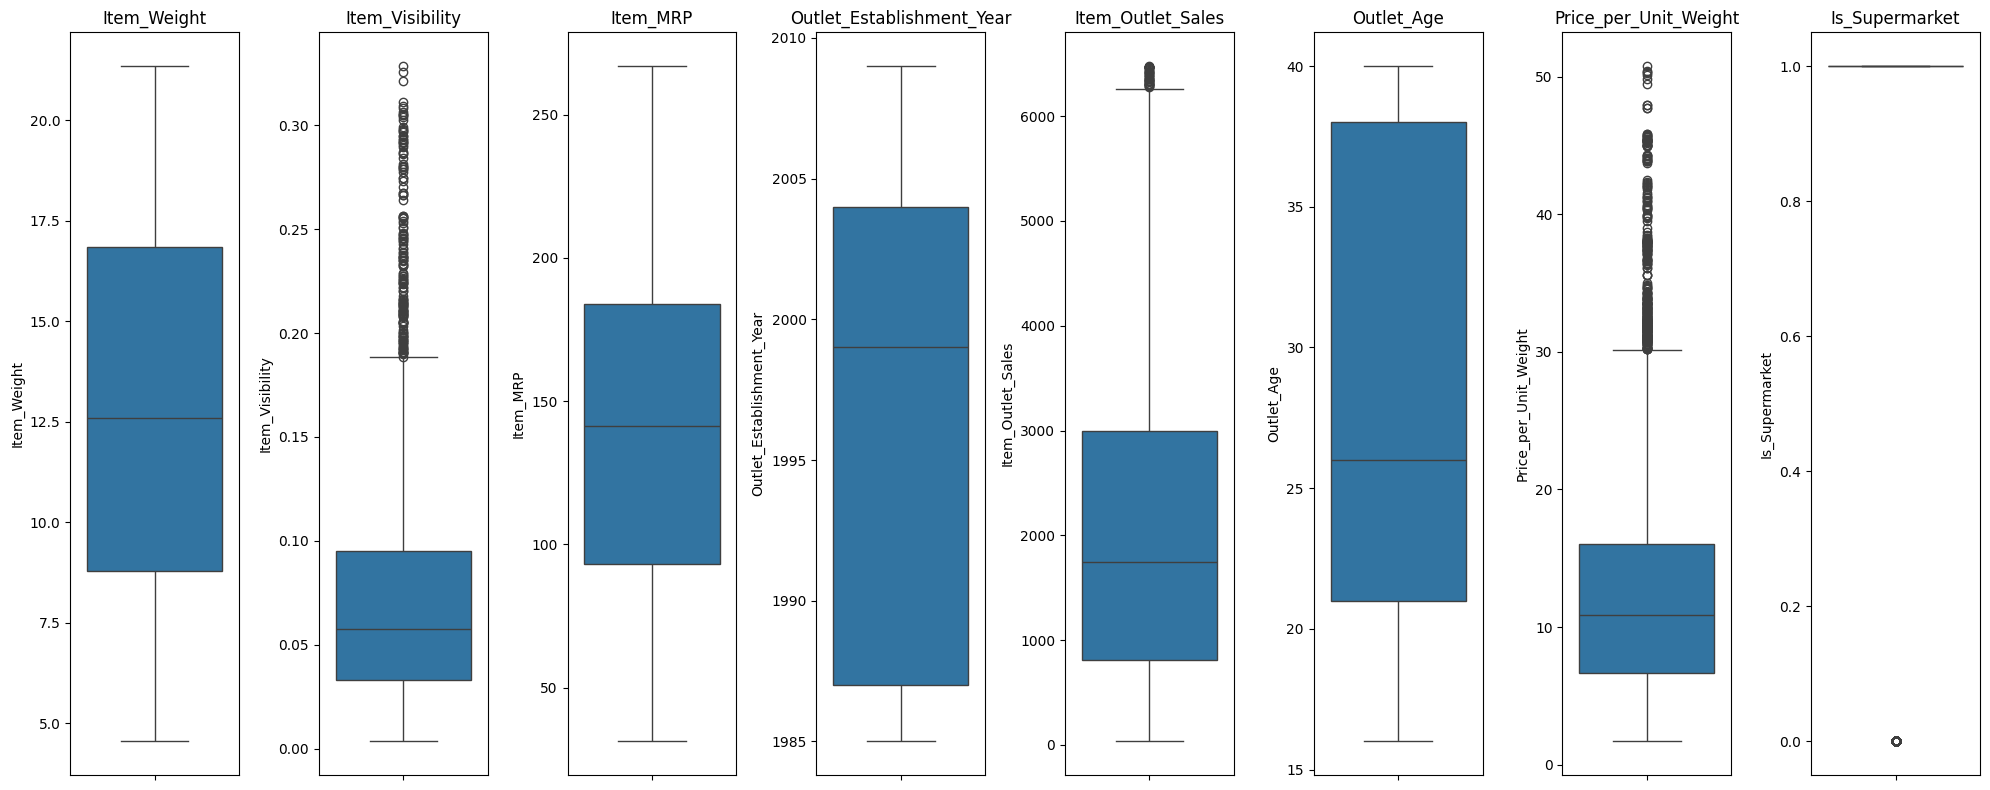

In [41]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i) 
    sns.boxplot(y=data[column])
    plt.title(column)
    
plt.tight_layout()
plt.show()

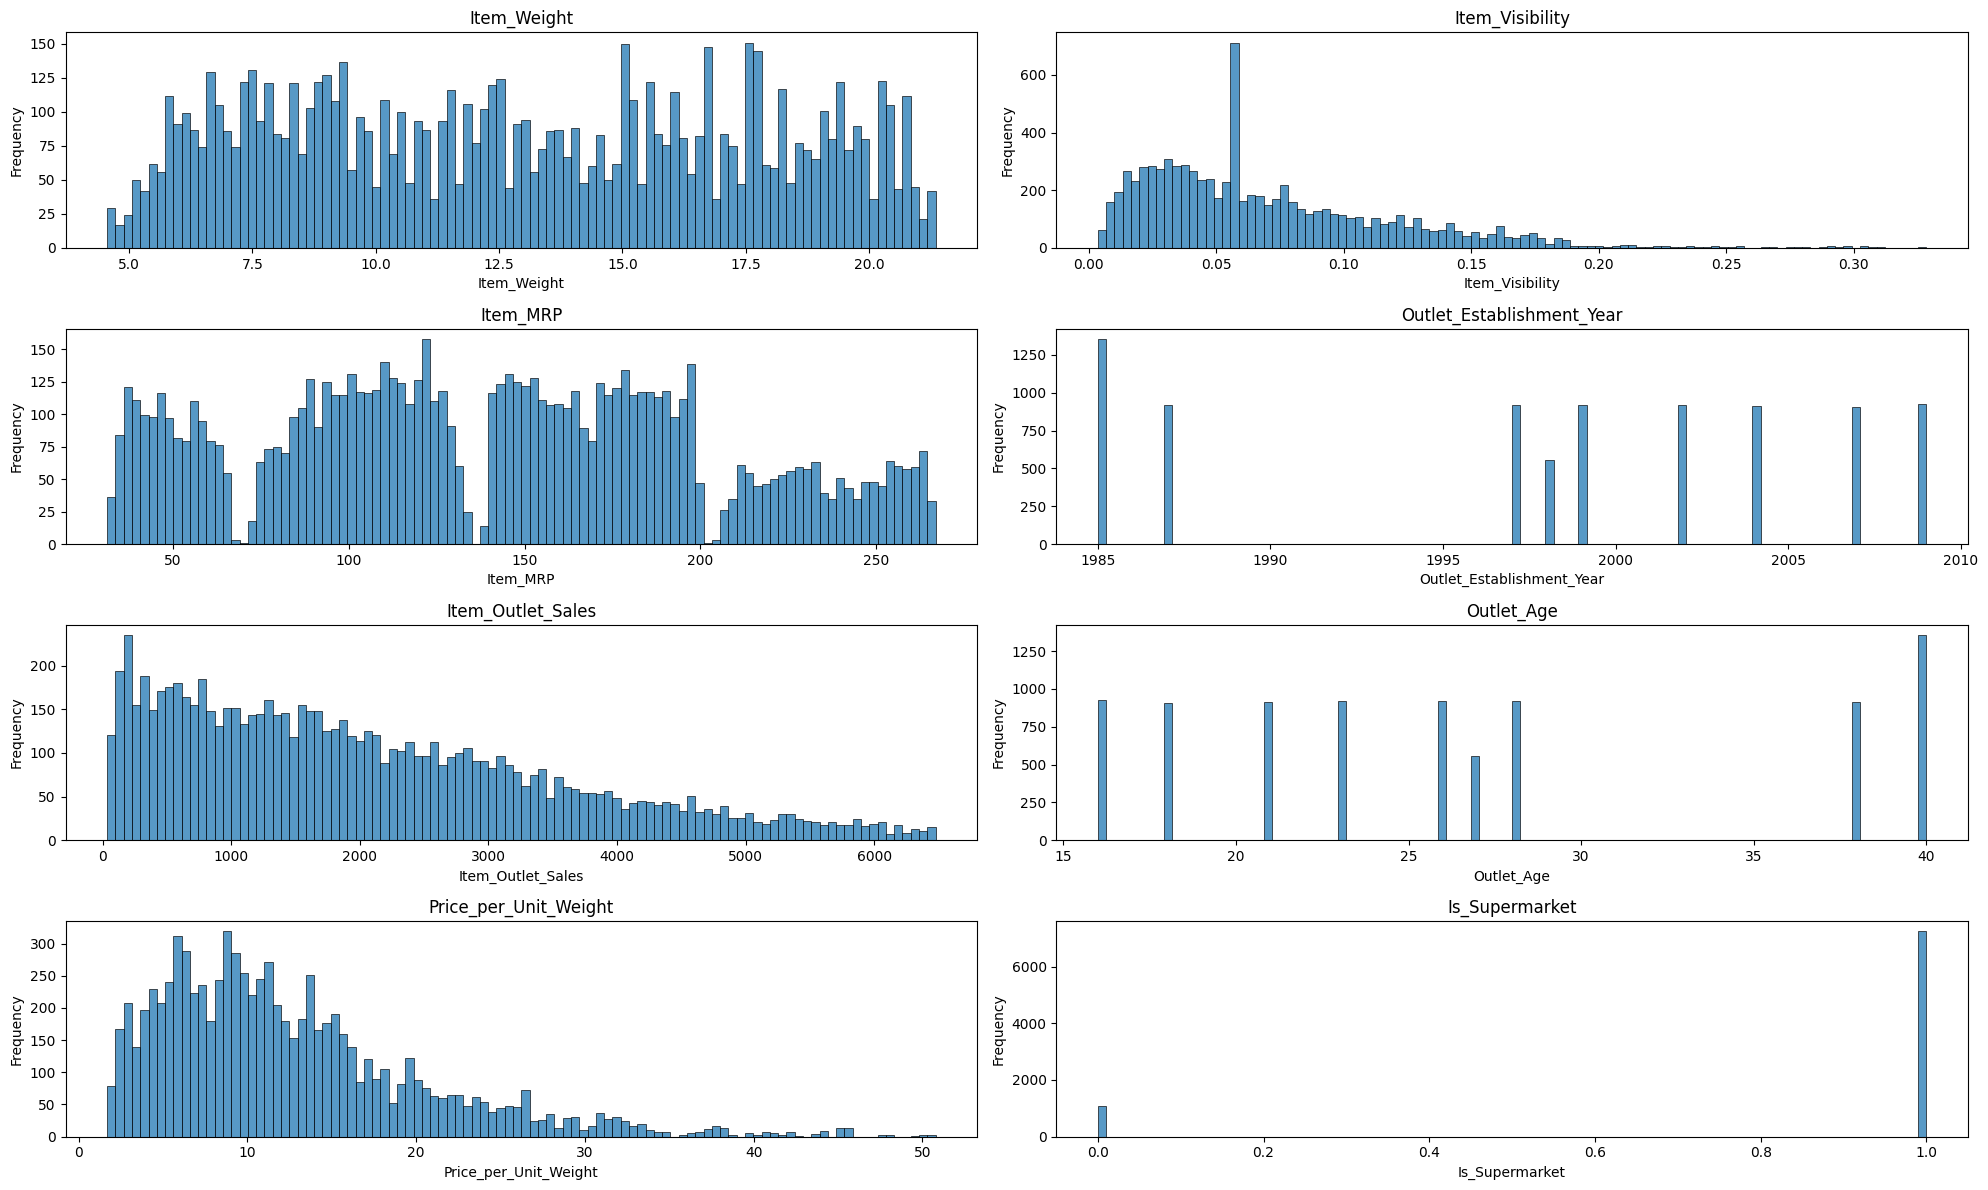

In [42]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 12))

num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2 

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 2, i)  
    sns.histplot(x=data[column], bins=100)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

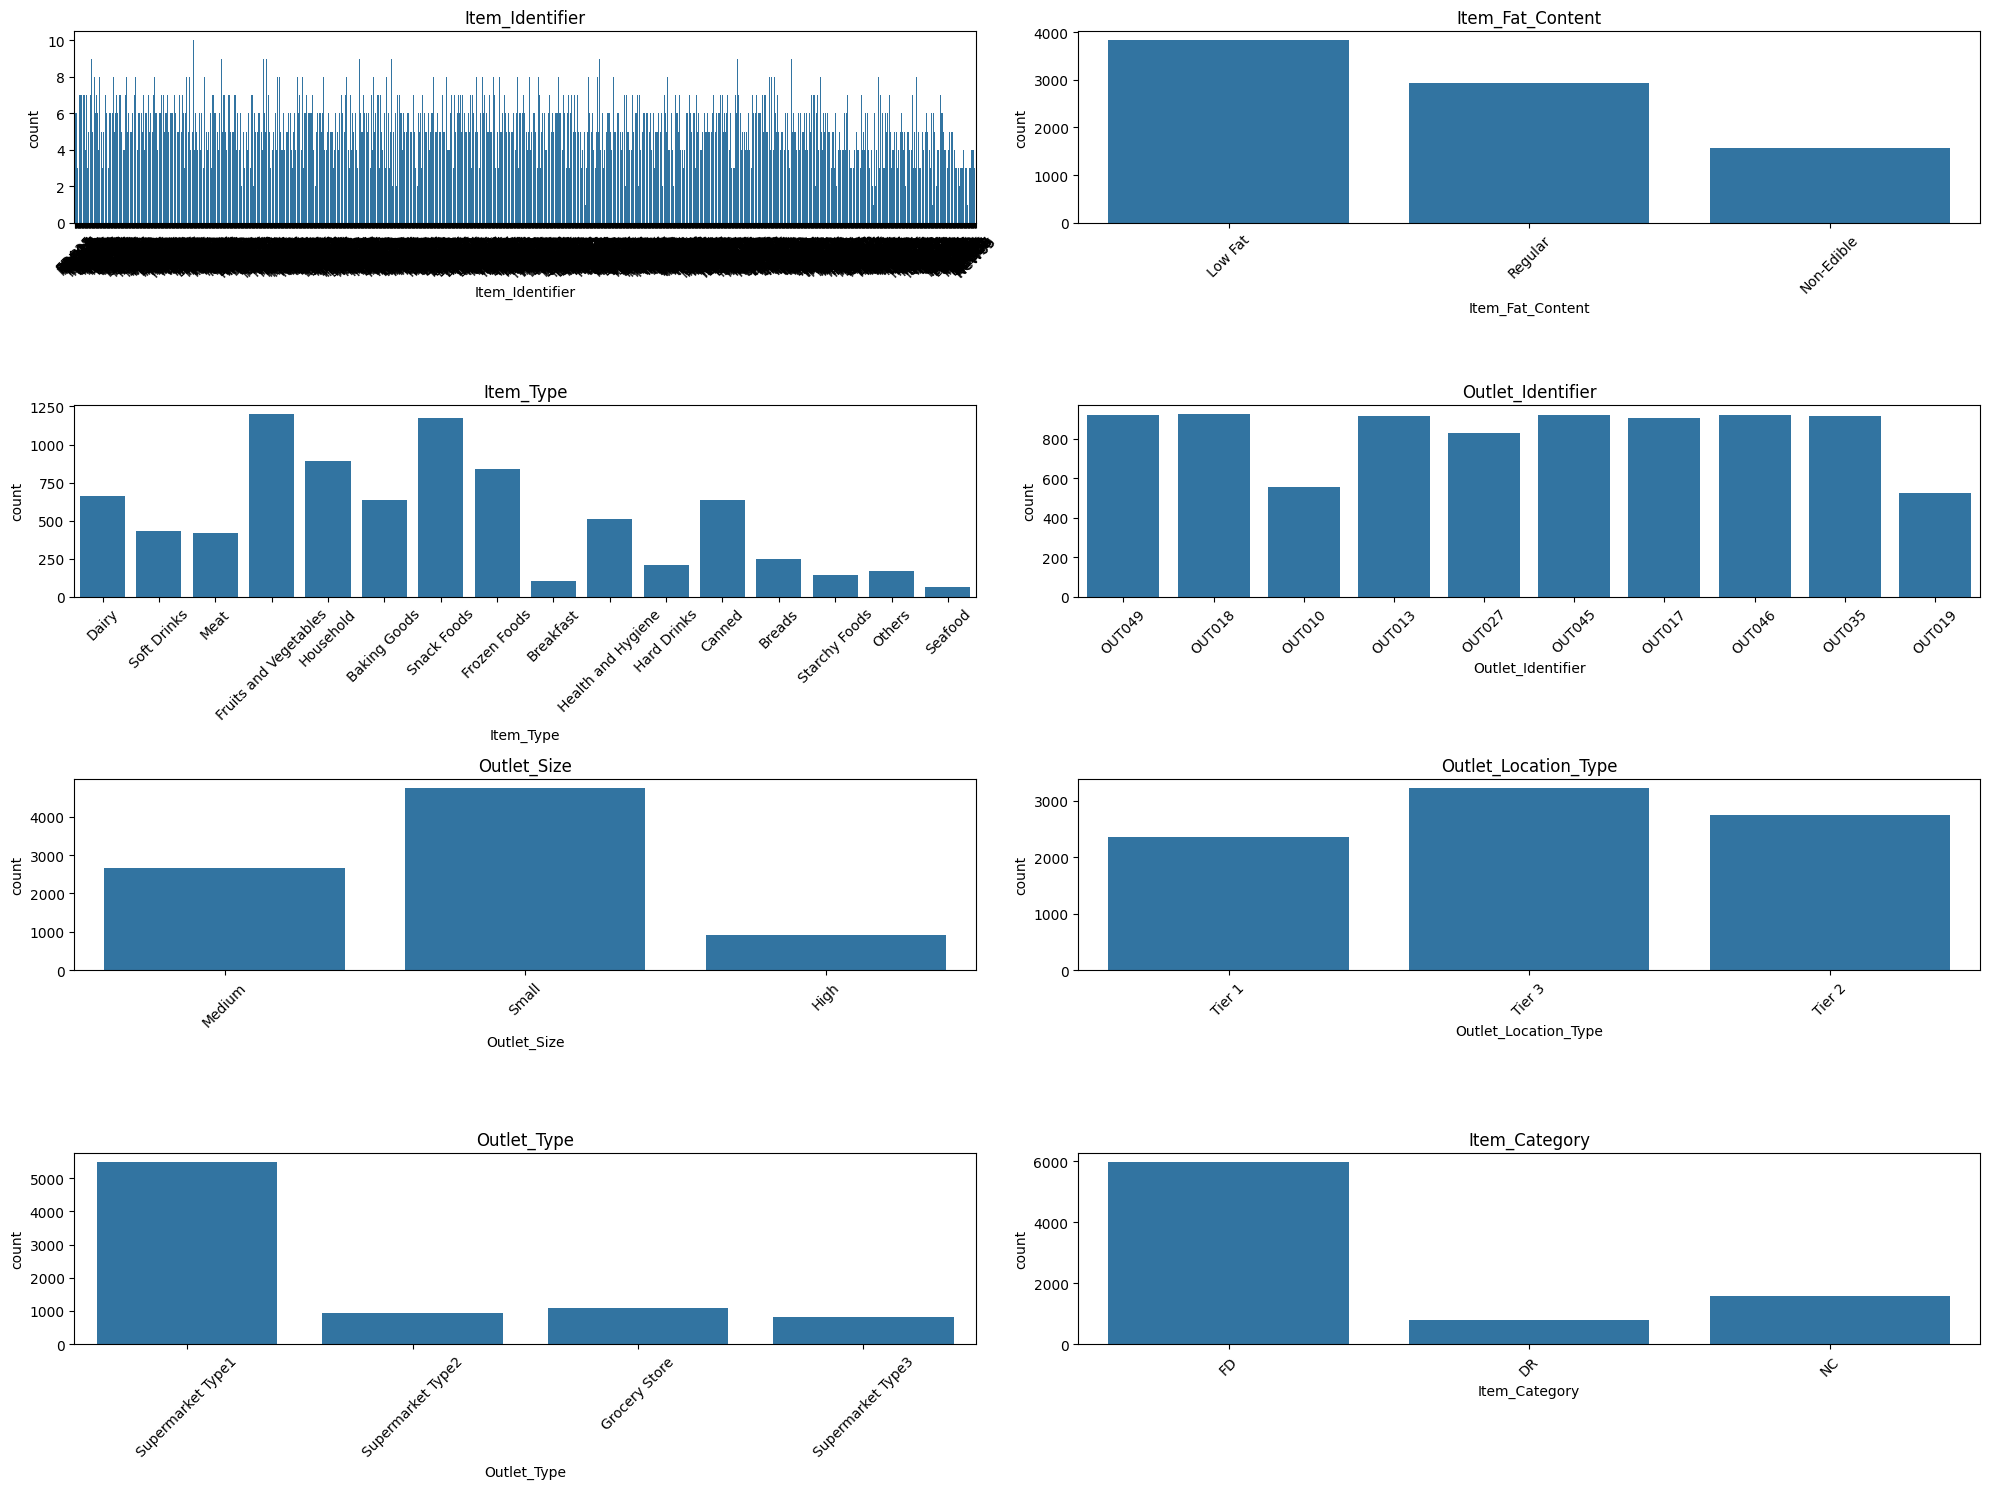

In [43]:
categorical_columns = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 15))

num_cols = len(categorical_columns)
num_rows = (num_cols + 1) // 2  

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 2, i)  
    sns.countplot(data=data, x=column)
    plt.title(column)
    plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()


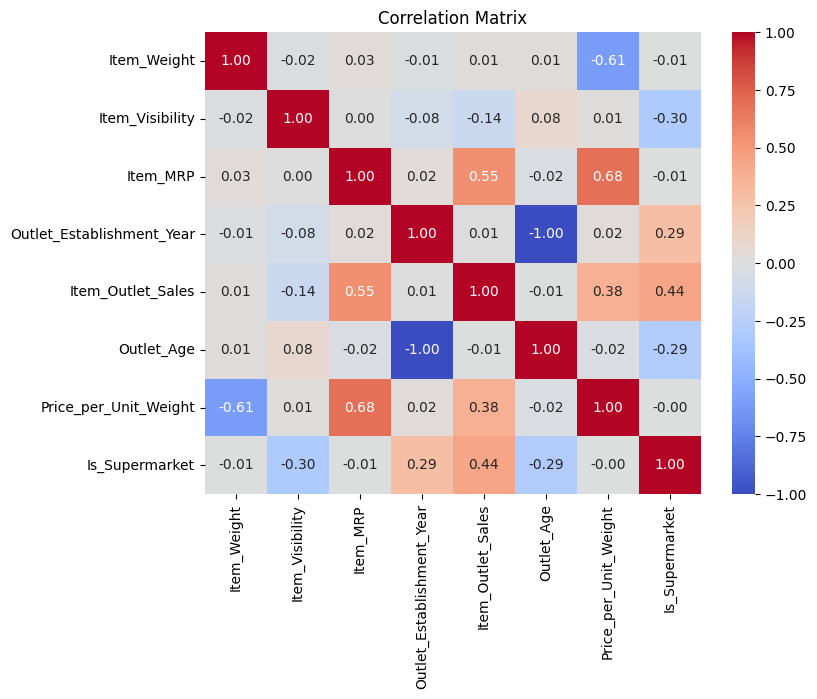

In [44]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [45]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Outlet_Age,Price_per_Unit_Weight,Is_Supermarket
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,26,26.861204,1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,16,8.153581,1
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,26,8.092457,1
3,FDX07,19.200,Regular,0.057772,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,27,9.484115,0
4,NCD19,8.930,Non-Edible,0.057772,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,38,6.031512,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FD,38,31.248623,1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,FD,23,12.906563,1
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NC,21,8.030415,1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FD,16,14.304189,1


In [47]:
data.to_csv("bigmart_cleaned.csv", index=False)

In [46]:
# from sklearn.preprocessing import PolynomialFeatures

# # Selecting only numerical features
# numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
# X_num = data[numerical_cols]

# # Apply polynomial feature transformation
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit_transform(X_num)

# # Convert back to DataFrame with new feature names
# import pandas as pd
# X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(numerical_cols))

# # Merge with categorical features
# X_final = pd.concat([X_poly_df, data.drop(columns=numerical_cols)], axis=1)

# print(X_final.shape)  # Check new a
